<a href="https://colab.research.google.com/github/FathimaNazarudeen/s3./blob/main/lbp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! unzip "/content/drive/MyDrive/fer.zip"

Streaming output truncated to the last 5000 lines.
 extracting: fer/train/sad/Training_65267116.jpg  
 extracting: fer/train/sad/Training_65275626.jpg  
 extracting: fer/train/sad/Training_6529266.jpg  
  inflating: fer/train/sad/Training_65329617.jpg  
  inflating: fer/train/sad/Training_65338712.jpg  
  inflating: fer/train/sad/Training_65338797.jpg  
  inflating: fer/train/sad/Training_65387162.jpg  
 extracting: fer/train/sad/Training_65404494.jpg  
 extracting: fer/train/sad/Training_65426218.jpg  
  inflating: fer/train/sad/Training_65430136.jpg  
  inflating: fer/train/sad/Training_65437377.jpg  
 extracting: fer/train/sad/Training_6545735.jpg  
 extracting: fer/train/sad/Training_65463385.jpg  
  inflating: fer/train/sad/Training_65473985.jpg  
  inflating: fer/train/sad/Training_65502829.jpg  
  inflating: fer/train/sad/Training_65505359.jpg  
 extracting: fer/train/sad/Training_65508578.jpg  
 extracting: fer/train/sad/Training_65516023.jpg  
 extracting: fer/train/sad/Traini

In [5]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
train_dir="/content/fer/train"
val_dir="/content/fer/test"

In [22]:
img_shape = 48
batch_size = 64

In [23]:
train_gen = ImageDataGenerator(
        rescale= 1 / 255,
        # Data Augmentation
        rotation_range=10,
        zoom_range= 0.2,
        width_shift_range= 0.1,
        height_shift_range= 0.1,
        fill_mode ="nearest"
    
    )

test_gen = ImageDataGenerator(rescale= 1 / 255 )

In [24]:
train_data = train_gen.flow_from_directory(
    train_dir,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size,
    subset='training', 
)


test_data = test_gen.flow_from_directory(
    val_dir,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [37]:
import os
import tensorflow as tf
import keras
import cv2
import numpy as np # linear algebra
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers , models, optimizers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *

In [38]:
def Create_CNN_Model():
    
    model = Sequential()
    
    #CNN1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_shape, img_shape, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    #CNN2
    model.add(Conv2D(64, (3,3), activation='relu', ))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    #CNN3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    
    #Output
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(7,activation='softmax'))
    
    
    return model

In [39]:
CNN_Model = Create_CNN_Model()

CNN_Model.summary()

CNN_Model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_13 (Conv2D)          (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                      

In [45]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

In [46]:
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [47]:
CNN_history = CNN_Model.fit( train_data , 
                            validation_data= test_data ,
                            epochs=500, batch_size= batch_size,
                            
                             steps_per_epoch= steps_per_epoch, 
                            validation_steps=validation_steps,callbacks=[callback]
                           )

Epoch 1/500
448/448 [==============================] - 43s 97ms/step - loss: 1.3124 - accuracy: 0.5002 - val_loss: 1.2263 - val_accuracy: 0.5319
Epoch 2/500
448/448 [==============================] - 42s 93ms/step - loss: 1.2939 - accuracy: 0.5093 - val_loss: 1.4702 - val_accuracy: 0.4222
Epoch 3/500
448/448 [==============================] - 43s 96ms/step - loss: 1.2868 - accuracy: 0.5129 - val_loss: 1.3375 - val_accuracy: 0.4940
Epoch 4/500
448/448 [==============================] - 41s 92ms/step - loss: 1.2720 - accuracy: 0.5206 - val_loss: 1.4312 - val_accuracy: 0.4614
Epoch 5/500
448/448 [==============================] - 41s 93ms/step - loss: 1.2560 - accuracy: 0.5251 - val_loss: 1.1898 - val_accuracy: 0.5413
Epoch 6/500
448/448 [==============================] - 41s 91ms/step - loss: 1.2378 - accuracy: 0.5332 - val_loss: 1.2530 - val_accuracy: 0.5145
Epoch 7/500
448/448 [==============================] - 41s 93ms/step - loss: 1.2287 - accuracy: 0.5394 - val_loss: 1.1542 - val_ac

In [48]:
CNN_Score = CNN_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(CNN_Score[0]))
print("Test Accuracy: {:.2f}%".format(CNN_Score[1] * 100))

113/113 [==============================] - 3s 28ms/step - loss: 1.1066 - accuracy: 0.6004
    Test Loss: 1.10657
Test Accuracy: 60.04%


In [49]:
def plot_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

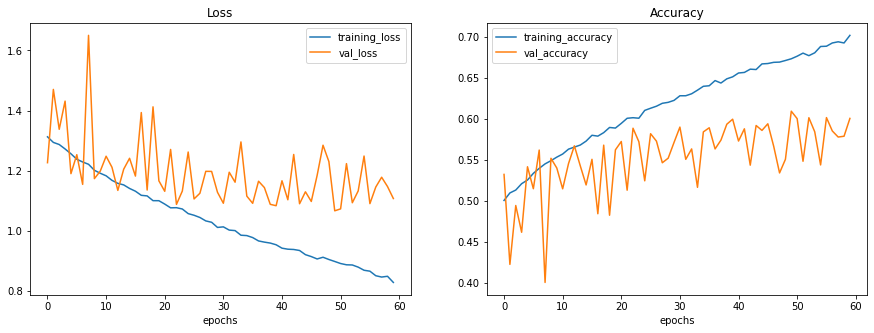

In [50]:
import matplotlib.pyplot as plt
plot_curves(CNN_history)

In [51]:
CNN_Predictions = CNN_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction 
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)

113/113 [==============================] - 4s 29ms/step


In [52]:
test_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Text(0.5, 1.0, 'CNN Confusion Matrix')

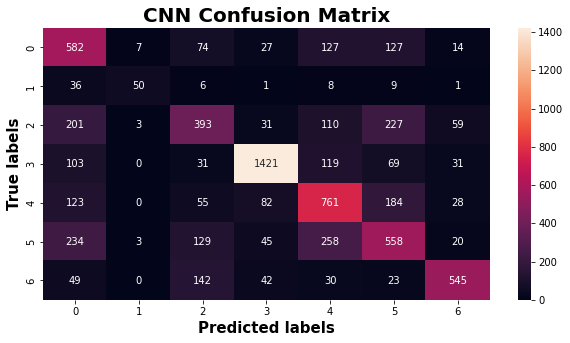

In [53]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix, classification_report

fig, ax= plt.subplots(figsize=(10,5))

cm=confusion_matrix(test_data.labels, CNN_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix', fontsize=20, fontweight='bold')

In [54]:
# Classification Report

report = classification_report(test_data.classes, CNN_Predictions)
print(report)

              precision    recall  f1-score   support

           0       0.44      0.61      0.51       958
           1       0.79      0.45      0.57       111
           2       0.47      0.38      0.42      1024
           3       0.86      0.80      0.83      1774
           4       0.54      0.62      0.58      1233
           5       0.47      0.45      0.46      1247
           6       0.78      0.66      0.71       831

    accuracy                           0.60      7178
   macro avg       0.62      0.57      0.58      7178
weighted avg       0.62      0.60      0.60      7178

